In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel('../../data/TenthCircuit.xlsx')
df.head(5)


,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category
0,Hansen v. SkyWest Airlines,12/21/16,1,Briscoe,McKay,Matheson,1,1,1,Title VII
1,Hansen v. SkyWest Airlines,12/21/16,2,Briscoe,McKay,Matheson,0,0,0,Title VII
2,Glapion v. Jewell,12/14/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII
3,Dye v. Moniz,12/06/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII
4,"Lister v. City of Wichita, Kansas",11/15/16,1,Lucero,Matheson,Bacharach,0,0,0,Title VII


Какой график лучше всех подойдет для визуализации тренда суммарного количества всех рассмотренных дел за каждый год? Выберите один верный ответ.

In [9]:
categories_count = df.groupby('Category')['Category'].count()
categories_count

Category
Immigration    554
Title VII      400
Name: Category, dtype: int64

Укажите, верно ли следующее утверждение: для визуализации суммарного количества дел по каждой категории (переменная Category) подойдет столбчатая диаграмма..

<BarContainer object of 2 artists>

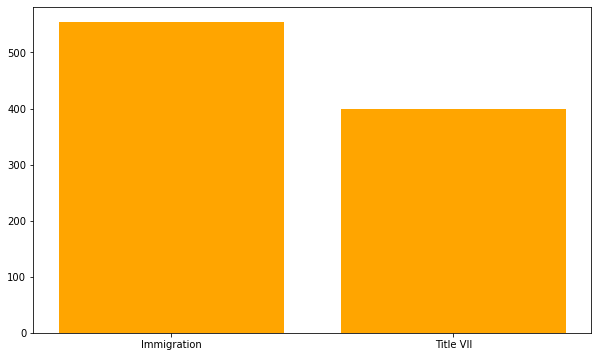

In [30]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(categories_count.index, categories_count, color='orange')

Выберите только те наблюдения, где все судьи голосовали одинаково. Постройте столбчатую диаграмму для суммарного количества заседаний по каждой категории и определите, каких заседаний и в какой категории дел больше — тех, где судьи голосовали либерально, или тех, где голоса были консервативны. Выберите один верный ответ.

In [11]:
df_judges = df[(df['Vote1'] == df['Vote2']) & (df['Vote2'] == df['Vote3'])]
# df_count = df_judges.groupby(['Category', 'Vote1']).count()
df_count = df_judges.groupby(['Category'])['Vote1'].value_counts()

In [12]:
df_count.index

MultiIndex([('Immigration', 0),
            ('Immigration', 1),
            (  'Title VII', 0),
            (  'Title VII', 1)],
           names=['Category', 'Vote1'])

<AxesSubplot:xlabel='Category,Vote1'>

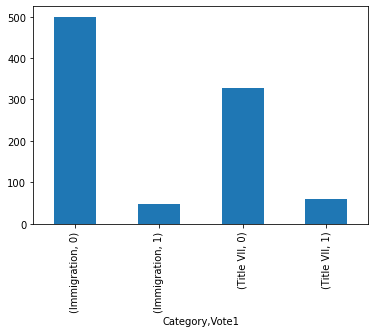

In [13]:
df_count.plot(kind='bar')

Выберите заседания только за 2016 год. Постройте линейный график и определите, в каких месяцах наблюдались пиковые значения по числу заседаний. Будьте внимательны — даты записаны в формате месяц/день/год. Выберите один верный ответ.

In [14]:
df['DateF'] = pd.to_datetime(df['Date'], dayfirst=True)
df16 = df[df['DateF'].dt.year == 2016]
df16.head()

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,DateF
0,Hansen v. SkyWest Airlines,12/21/16,1,Briscoe,McKay,Matheson,1,1,1,Title VII,2016-12-21
1,Hansen v. SkyWest Airlines,12/21/16,2,Briscoe,McKay,Matheson,0,0,0,Title VII,2016-12-21
2,Glapion v. Jewell,12/14/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII,2016-12-14
3,Dye v. Moniz,12/06/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII,2016-06-12
4,"Lister v. City of Wichita, Kansas",11/15/16,1,Lucero,Matheson,Bacharach,0,0,0,Title VII,2016-11-15


In [15]:
df16['Month'] = df16['DateF'].dt.month
df16.head()

C:\Users\dvavk\AppData\Local\Temp/ipykernel_2880/1378088699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16['Month'] = df16['DateF'].dt.month


,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,DateF,Month
0,Hansen v. SkyWest Airlines,12/21/16,1,Briscoe,McKay,Matheson,1,1,1,Title VII,2016-12-21,12
1,Hansen v. SkyWest Airlines,12/21/16,2,Briscoe,McKay,Matheson,0,0,0,Title VII,2016-12-21,12
2,Glapion v. Jewell,12/14/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII,2016-12-14,12
3,Dye v. Moniz,12/06/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII,2016-06-12,6
4,"Lister v. City of Wichita, Kansas",11/15/16,1,Lucero,Matheson,Bacharach,0,0,0,Title VII,2016-11-15,11


<AxesSubplot:>

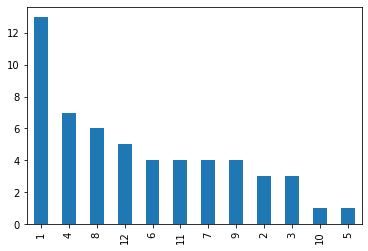

In [16]:
df16['Month'].value_counts().plot(kind='bar')

Укажите, верно ли следующее утверждение: для переменных, обозначающих число заседаний и их категорию, можно построить интерпретируемую диаграмму рассеяния.

In [17]:
df.head()

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,DateF
0,Hansen v. SkyWest Airlines,12/21/16,1,Briscoe,McKay,Matheson,1,1,1,Title VII,2016-12-21
1,Hansen v. SkyWest Airlines,12/21/16,2,Briscoe,McKay,Matheson,0,0,0,Title VII,2016-12-21
2,Glapion v. Jewell,12/14/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII,2016-12-14
3,Dye v. Moniz,12/06/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII,2016-06-12
4,"Lister v. City of Wichita, Kansas",11/15/16,1,Lucero,Matheson,Bacharach,0,0,0,Title VII,2016-11-15


Используя исходные данные, определите среднее число заседаний за каждый сезон (зима, весна, лето, осень). Постройте столбчатую диаграмму, определите месяц с наибольшим показателем. Будьте внимательны — даты записаны в формате месяц/день/год. Введите ответ в виде слова (например, осень).

In [18]:
# вычистяем сезон 0 - зима, 1 - весна, 2 - лето, 3 - осень
df['Season'] = df['DateF'].dt.month % 12 // 3
df.head()

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,DateF,Season
0,Hansen v. SkyWest Airlines,12/21/16,1,Briscoe,McKay,Matheson,1,1,1,Title VII,2016-12-21,0
1,Hansen v. SkyWest Airlines,12/21/16,2,Briscoe,McKay,Matheson,0,0,0,Title VII,2016-12-21,0
2,Glapion v. Jewell,12/14/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII,2016-12-14,0
3,Dye v. Moniz,12/06/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII,2016-06-12,2
4,"Lister v. City of Wichita, Kansas",11/15/16,1,Lucero,Matheson,Bacharach,0,0,0,Title VII,2016-11-15,3


<AxesSubplot:xlabel='Season'>

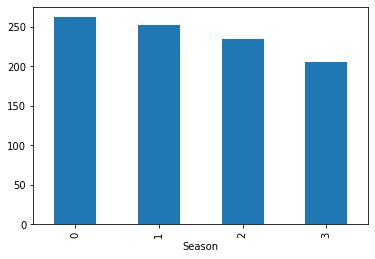

In [19]:
df.groupby('Season')['Title'].count().plot(kind='bar')

Выберите только заседания по категории иммиграции. Постройте столбчатую диаграмму по суммарному числу заседаний, на котором присутствовал каждый судья. В ответ запишите имя судьи, который принимал участие в наибольшем количестве заседаний (например, Holmes).

In [20]:
df_immigration = df[df['Category']=='Immigration']
df_immigration.head(3)

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,DateF,Season
400,Juan v. Lynch,12/06/16,1,Lucero,McHugh,Moritz,0,0,0,Immigration,2016-06-12,2
401,Zu¬Й√Ы√ТChen Horng v. Lynch,09/27/16,1,Tymkovich,Bacharach,Moritz,1,1,1,Immigration,2016-09-27,3
402,Osuna¬Й√Ы√ТGutierrez v. Johnson,09/22/16,1,Briscoe,Ebel,Bacharach,0,0,0,Immigration,2016-09-22,3


<AxesSubplot:>

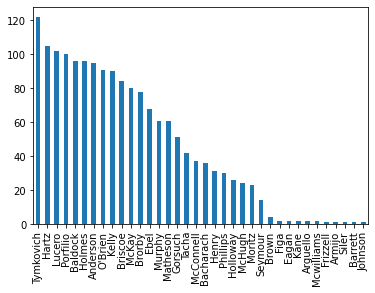

In [21]:
pd_judge1 = df_immigration.groupby('Judge1').count()
pd_judge2 = df_immigration.groupby('Judge2').count()
pd_judge3 = df_immigration.groupby('Judge3').count()
pd_judge = pd.concat([pd_judge1, pd_judge2, pd_judge3])

# pd_judge.loc['Bacharach']
# pd_judge.loc['Murphy']

pd_judge.groupby(pd_judge.index)['Title'].sum().sort_values(ascending=False).plot(kind='bar')

Определите, какие дела (переменная Title) рассматривались чаще всего. Постройте столбчатую диаграмму по суммарному числу таких заседаний, на котором присутствовал каждый судья. В ответ запишите имя судьи, который принимал участие в наибольшем количестве заседаний (например, Holmes).

In [22]:
df_mode = df[df['Title'].isin(df['Title'].mode())]
df_mode.head(3)

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,DateF,Season
69,"Tabor v. Hilti, Inc.",09/02/14,1,Hartz,Tymkovich,Holmes,0,0,0,Title VII,2014-02-09,0
125,"Tabor v. Hilti, Inc.",01/15/13,1,Lucero,O'Brien,Matheson,1,1,1,Title VII,2013-01-15,0
126,"Tabor v. Hilti, Inc.",01/15/13,2,Lucero,O'Brien,Matheson,0,0,0,Title VII,2013-01-15,0


<AxesSubplot:>

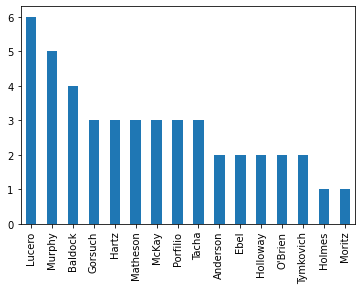

In [23]:
pd_judge1 = df_mode.groupby('Judge1').count()
pd_judge2 = df_mode.groupby('Judge2').count()
pd_judge3 = df_mode.groupby('Judge3').count()
pd_judge = pd.concat([pd_judge1, pd_judge2, pd_judge3])

# pd_judge.loc['Bacharach']
# pd_judge.loc['Murphy']

pd_judge.groupby(pd_judge.index)['Title'].sum().sort_values(ascending=False).plot(kind='bar')

Обратите внимание на то, как в каждом деле голосовали судьи. Постройте столбчатую диаграмму и определите, каких решений, принятых большинством (2 и более) голосов, больше. Укажите, верно ли следующее утверждение: решений, где большинство судей голосовало консервативно, больше.

In [24]:
df['Vote Count'] = df['Vote1'] + df['Vote2'] + df['Vote3']
df['Vote Group'] = df['Vote Count'] > 1
df.head(3)

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,DateF,Season,Vote Count,Vote Group
0,Hansen v. SkyWest Airlines,12/21/16,1,Briscoe,McKay,Matheson,1,1,1,Title VII,2016-12-21,0,3,True
1,Hansen v. SkyWest Airlines,12/21/16,2,Briscoe,McKay,Matheson,0,0,0,Title VII,2016-12-21,0,0,False
2,Glapion v. Jewell,12/14/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII,2016-12-14,0,0,False


<AxesSubplot:xlabel='Vote Group'>

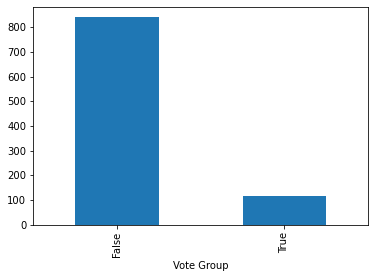

In [25]:
df.groupby('Vote Group')['Vote Group'].count().plot(kind='bar')

Выберите только те заседания, в которых участвовал судья Lucero. Постройте линейный график и определите, в каком году он участвовал в заседаниях меньше всего. Будьте внимательны — даты записаны в формате месяц/день/год. В ответ запишите целое число (например, 2016).

<AxesSubplot:xlabel='DateF'>

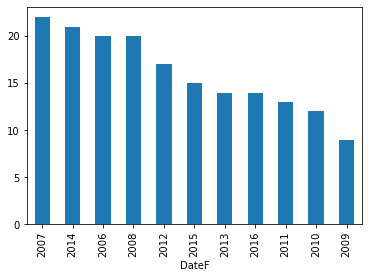

In [26]:
df_lucero = df[(df['Judge1']=='Lucero')|(df['Judge2']=='Lucero')|(df['Judge3']=='Lucero')]
df_lucero.groupby(df['DateF'].dt.year).count()['DateF'].sort_values(ascending=False).plot(kind='bar')